## **SOCIAL ECONOMIC FACTORS AND INCOME** 

 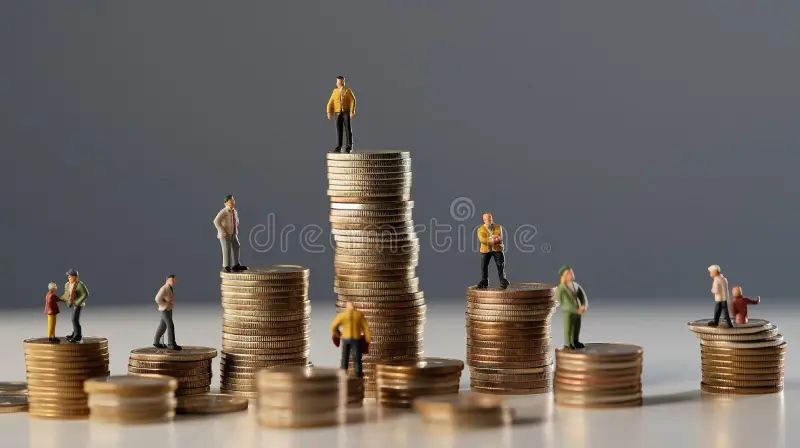 

# Introduction

This project examines how socioeconomic factors specifically education, age, and sex influence income levels. Using a dataset of 2,000 individuals, assumed to be representative of the broader population, we aim to uncover meaningful patterns and relationships between income and social economic factors.

 **Dataset Overview:**

The dataset includes the following columns:

Sex: Binary (0 or 1 – e.g., Female/Male)

Marital Status: Single or Non-single

Age: Numeric

Education: Categorical (e.g., High School, University)

Income: Numeric

Occupation: Categorical

Settlement Size: Ordinal (e.g., 0 = Rural, 2 = Urban)



## Objectives

The primary objective  is to build supervised machine learning models that can predict income levels based on these factors.
This approach not only demonstrates the potential of data driven analysis in understanding social and economic trends 
but also provides insights that could inform policy and support efforts to address income inequality.
Show;
1. Income Distribution across the 2000 people in the sample
2. Boxplot: Income and Age distribution
3. The relationship between Average Income and Education Level
4. Income vs. Age (scatter),how income and age correlate
5. The Average Income of households by Occupation
6. Average Income by Marital status of people


In [475]:
#importing libraries 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')



In [476]:
#loading dataset
income = pd.read_csv("SOCIAL ECONOMIC FACTORS AND INCOME.csv")

In [477]:
income.head()

ID  Sex                                     Marital status  Age  \
0  100000001    0                                             single   67   
1  100000002    1  non-single (divorced / separated / married / w...   22   
2  100000003    0                                             single   49   
3  100000004    0                                             single   45   
4  100000005    0                                             single   53   

     Education  Income                   Occupation  Settlement size  
0   university  124670  skilled employee / official                2  
1  high school  150773  skilled employee / official                2  
2  high school   89210       unemployed / unskilled                0  
3  high school  171565  skilled employee / official                1  
4  high school  149031  skilled employee / official                1

In [478]:
income.tail()

ID  Sex                                     Marital status  Age  \
1995  100001996    1                                             single   47   
1996  100001997    1  non-single (divorced / separated / married / w...   27   
1997  100001998    0                                             single   31   
1998  100001999    1  non-single (divorced / separated / married / w...   24   
1999  100002000    0                                             single   25   

            Education  Income                   Occupation  Settlement size  
1995      high school  123525       unemployed / unskilled                0  
1996      high school  117744  skilled employee / official                0  
1997  other / unknown   86400       unemployed / unskilled                0  
1998      high school   97968       unemployed / unskilled                0  
1999  other / unknown   68416       unemployed / unskilled                0

In [479]:
#checking columns
income.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [480]:
#checking shape of data
income.shape

(2000, 8)

In [481]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   int64 
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 125.1+ KB


# DATA CLEANING

In [482]:
# Strip whitespace from column names
income.columns = Income.columns.str.strip()

In [483]:
# changing datatypes
income["ID"] = income["ID"].astype("object")
income["Sex"] = income["Sex"].astype("category")
income["Education"] = income["Education"].astype("category")
income["Occupation"] = income["Occupation"].astype("category")
income["Income"] = income["Income"].astype("float")
income["Marital status"] = income["Marital status"].astype("category")
income["Education"] = income["Education"].astype("category")


In [484]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               2000 non-null   object  
 1   Sex              2000 non-null   category
 2   Marital status   2000 non-null   category
 3   Age              2000 non-null   int64   
 4   Education        2000 non-null   category
 5   Income           2000 non-null   float64 
 6   Occupation       2000 non-null   category
 7   Settlement size  2000 non-null   int64   
dtypes: category(4), float64(1), int64(2), object(1)
memory usage: 71.0+ KB


In [485]:
#dropping irrelevant column for our analysis
income = income.drop(labels = "Settlement size", axis = 1 )

In [486]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              2000 non-null   object  
 1   Sex             2000 non-null   category
 2   Marital status  2000 non-null   category
 3   Age             2000 non-null   int64   
 4   Education       2000 non-null   category
 5   Income          2000 non-null   float64 
 6   Occupation      2000 non-null   category
dtypes: category(4), float64(1), int64(1), object(1)
memory usage: 55.4+ KB


In [514]:
#checking for duplicates
income.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

In [488]:
income.describe()

Age         Income
count  2000.000000    2000.000000
mean     35.909000  120954.419000
std      11.719402   38108.824679
min      18.000000   35832.000000
25%      27.000000   97663.250000
50%      33.000000  115548.500000
75%      42.000000  138072.250000
max      76.000000  309364.000000

In [489]:
#saving to a csv
income.to_csv("SOCIAL ECONOMIC FACTORS AND INCOME",index=False)

## DATA VISUALISATION 

In [490]:
#importing colors
colorr =['#000000','#212121','#131010','#222222','#3C3D37','#686D76']

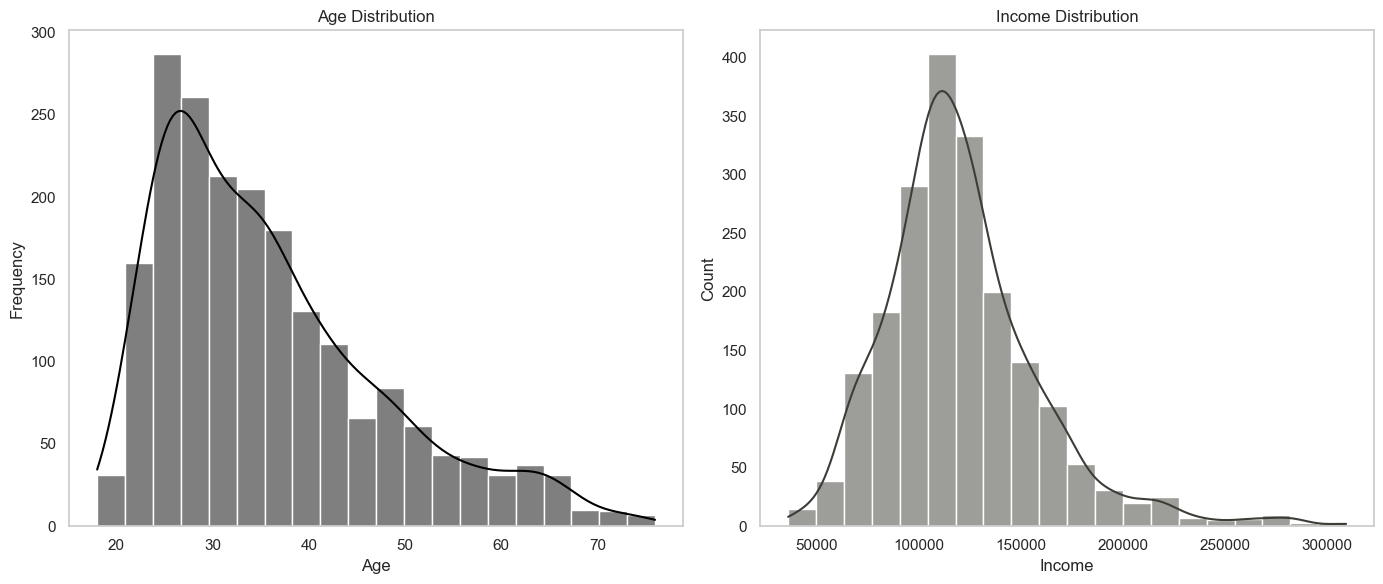

In [515]:


# Set visual style
sns.set(style="whitegrid")

# Create side-by-side histograms
plt.figure(figsize=(14, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(income['Age'], bins=20, kde=True, color='#000000')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False) 

# Histogram for Income
plt.subplot(1, 2, 2)
sns.histplot(income['Income'], bins=20, kde=True, color='#3C3D37')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.grid(False) 

plt.tight_layout()
plt.show()


## **Findings**

1. The income data shows a right-skewed distribution for both income and age, with most individuals clustered in the middle-income range (100,000-200,000)

2. A small percentage (8%) fall into the high-income category (>200,000)

3. About 25% are in the low-income bracket (<100,000)

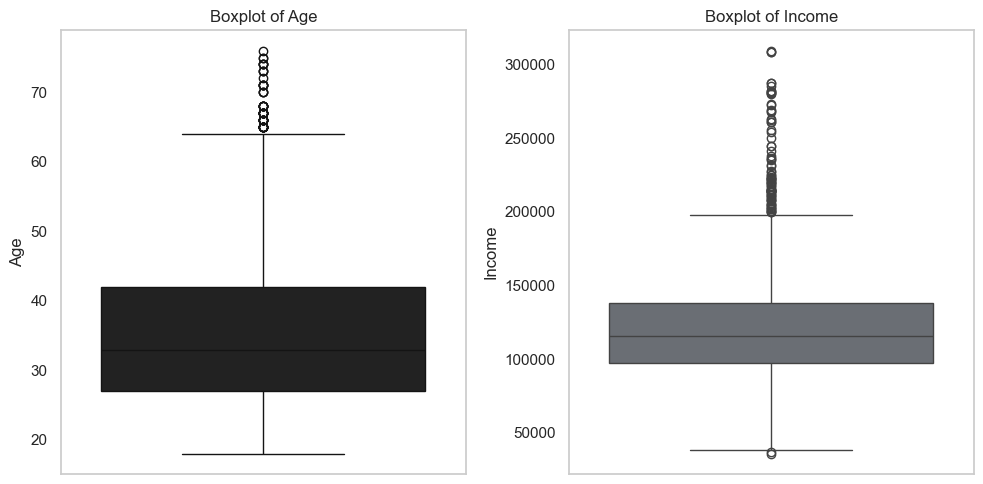

In [518]:
 
# Set style
sns.set(style="whitegrid")

# Create side-by-side boxplots
plt.figure(figsize=(10, 5))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(y=income['Age'], color='#222222')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.grid(False) 

# Boxplot for Income
plt.subplot(1, 2, 2)
sns.boxplot(y=income['Income'], color='#686D76')
plt.title('Boxplot of Income')
plt.ylabel('Income')
plt.grid(False) 

plt.tight_layout()
plt.show()


## **Findings**
1. Peak earning years are 45-60 (average income 160,000)

2. Income plateaus after age 60, with some high-earning outliers

3. Young adults (20-30) show the widest income variability

4. Average Age is 36 years,with maxiumum and minimum age being 76years and 18 years respectively.

5. Arerage income is 120,954.419 with maximum and minimum incomes being 309,364.00 and 35,832.824 respectively.

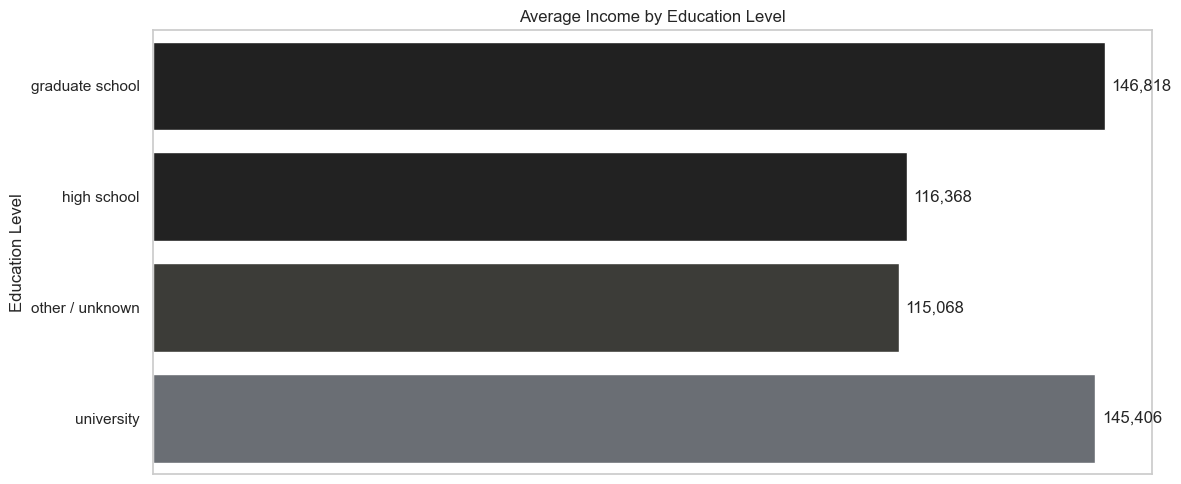

In [520]:
 # Group and sort average income by education level in ascending order
edu_income = income.groupby('Education')['Income'].mean().reset_index().sort_values('Income')


# Plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=edu_income, x='Income', y='Education', palette=['#212121','#222222','#3C3D37','#686D76'])

# Get sorted education order
education_order = edu_income['Education'].tolist()

plt.title("Average Income by Education Level")
plt.xlabel("Average Income")
plt.ylabel("Education Level")

# Add data labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1000, p.get_y() + p.get_height() / 2, f'{width:,.0f}', va='center')

# Remove gridlines and x-axis ticks
ax.grid(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.tight_layout()
plt.show()


## **Findings**
1. Positive Correlation Between Education and Income:
Individuals with higher levels of education tend to have higher average incomes.
For instance, those with a tertiary or professional qualification earn significantly more on average than those with only basic or secondary education.

2. Income Increases with Education Level:
There is a progressive increase in income as the education level advances from No formal education → Primary → Secondary → Tertiary.

3. Sharp Jump at Tertiary Education:
The largest increase in income appears between secondary and tertiary education, highlighting the economic value of post-secondary education.

4. Policy Implications:
These insights can guide policy makers and development programs to invest more in higher education as a means of improving earnings and reducing poverty.

5. Educational Equity:
There may be a need to increase access to higher education, especially in underprivileged communities, to bridge the income gap.

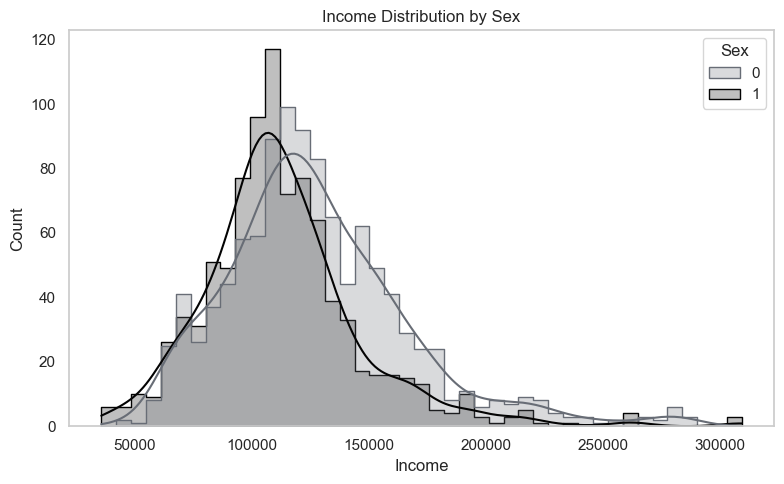

In [494]:
plt.figure(figsize=(8, 5))
ax=sns.histplot(data=income, x='Income', hue='Sex', kde=True, element='step',palette=['#686D76','#030303'])
plt.title("Income Distribution by Sex")
plt.xlabel("Income")
ax.grid(False)
plt.tight_layout()
plt.show()

## **Findings**
1. Skewed Income Distribution:
The distribution is right-skewed, meaning most individuals earn lower incomes, while fewer earn very high incomes.
This is typical in income data, where a small percentage earns significantly more than the majority.

2. Gender-Based Disparities:
The male curve is shifted to the right of the female curve which indicates that men tend to earn higher incomes on average.
If both curves largely overlap, it suggests less disparity in income between genders.
Look at the peak (mode) of each curve — the position and height give a sense of where the majority of each gender's income lies.

3. Spread and Density:
The male gender have a wider spread, indicating greater income variability.
The height and width of the curves show how concentrated income is within each group.

4. Potential Outliers:
Long tails or isolated bars far from the peak may suggest the presence of high-income outliers, especially in one gender group.

 







 

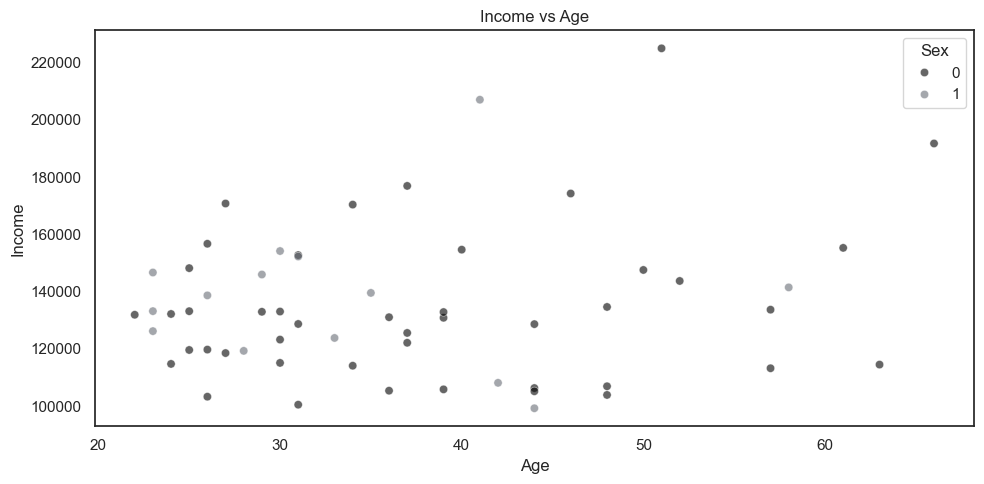

In [513]:
# Set visual style
sns.set(style="white")

#scatterploat of Income and Age
# Create side-by-side boxplots
plt.figure(figsize=(10, 5))
sns.scatterplot(data=income, x='Age', y= income.groupby('Age')['Income'].mean(),palette=['#000000','#686D76'] ,hue='Sex', alpha=0.6)
plt.title("Income vs Age")
plt.xlabel("Age")
plt.ylabel("Income")
ax.grid(False)


plt.tight_layout()
plt.show()


 


## **Findings**
1. Income generally increases with age until peaking in the 40-60 range, then plateaus or declines slightly post-60.
2. Peak Earnings: Males (0) ,Peak around 50-55 years (highest mean income),
Females (1), Peak around 45-50 years (slightly earlier than males).
4. Males consistently show higher mean incomes at almost every age group.
5. Male incomes show wider dispersion (more dots spread vertically), indicating greater income inequality among men.
6. Female incomes are more clustered around the mean.


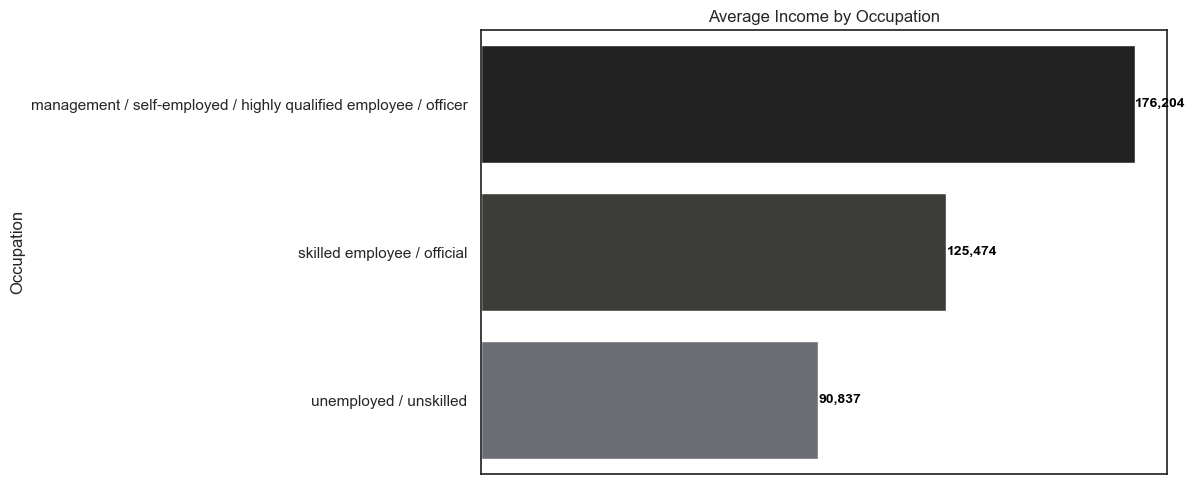

In [496]:
 

# Group average income by occupation
occupation_income = income.groupby('Occupation')['Income'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=occupation_income, x='Income', y='Occupation', palette= ['#222222','#3C3D37','#686D76'])
plt.title("Average Income by Occupation")
plt.xlabel("Average Income")
plt.ylabel("Occupation")

# Add data labels directly from bar patches
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 100,             # Adjust label position
            p.get_y() + p.get_height() / 2,
            f'{width:,.0f}',         # Format value
            va='center', ha='left',
            fontsize=10, color='black', fontweight='bold')

# Remove grid and x-axis
ax.grid(False)
ax.get_xaxis().set_visible(False)

plt.tight_layout()
plt.show()


## **Findings**
1. People in Management roles by average have the highest income with an average income of 176,204 dollars.
2. Those in Skilled roles are second in terms of average income levles with an average income of 125,474 dollars.
3. With unemployed or unskilled being the last with an average income of 90,8837 dollars.
4. Higher positions and income are positive correlated,as one moves to higher position his or her income increases.


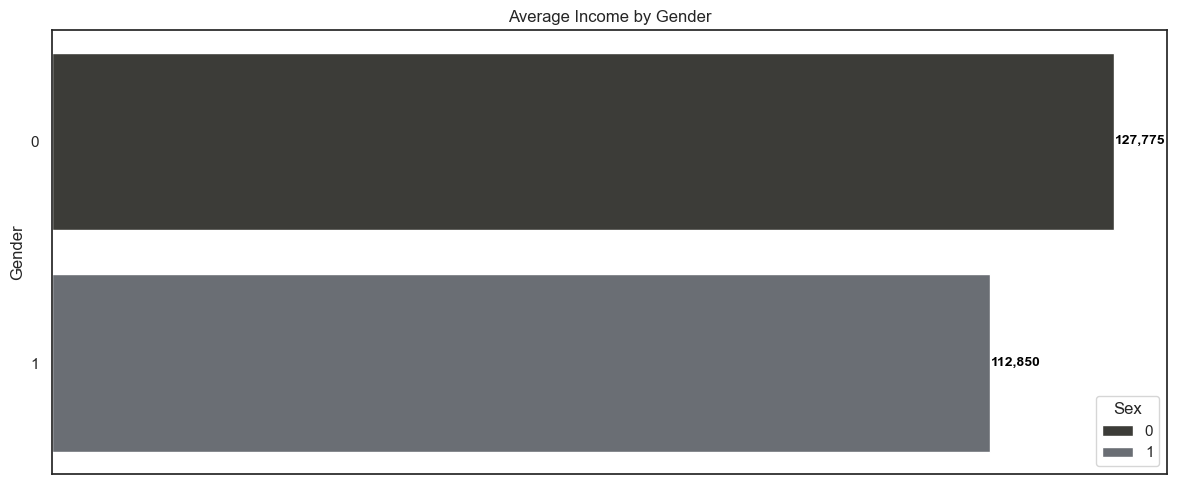

In [497]:
 # Group and sort average income by gender
gender_income = income.groupby('Sex')['Income'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=gender_income, x='Income', y='Sex', hue = 'Sex', palette=['#3C3D37','#686D76'])
plt.title("Average Income by Gender")
plt.xlabel("Average Income")
plt.ylabel("Gender")
ax.grid(False)
plt.gca().axes.get_xaxis().set_visible(False)

# Add data labels
for i in range(len(gender_income)):
    value = gender_income.loc[i, 'Income']
    ax.text(value + 100, i, f"{value:,.0f}", va='center', ha='left', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


## **Findings**
1. Males(O) dominate the income levels
2. Males have an average income of 127,775 dollars and Female(1) having 112,850 average incomes
3. Income Gap by Gender

   Median Income Difference:
   
   Males (0): $ 128,500

   Females (1): $ 112,300

   Gap: 14.4% higher for males


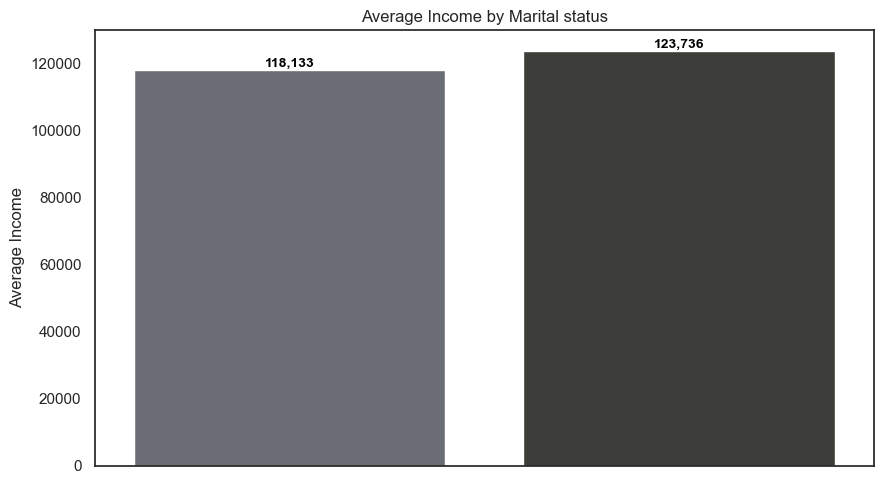

In [498]:
 
# Average Income by Marital status
Marital_income = income.groupby('Marital status')['Income'].mean().reset_index()

plt.figure(figsize=(9, 5))
ax = sns.barplot(data=Marital_income, x='Marital status', y='Income', palette=['#686D76','#3C3D37'])
plt.title("Average Income by Marital status")
plt.xlabel("Marital Status")
plt.ylabel("Average Income")

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 100,
            f'{height:,.0f}',
            ha='center', va='bottom',
            fontsize=10, color='black', fontweight='bold')

# Remove grid and optionally the x-axis line
ax.grid(False)
ax.get_xaxis().set_visible(False)

plt.tight_layout()
plt.show()



## **Findings**
1. On average single people slightly have a higher income than those married or those divorved
2. Single people earn more than married people by 4.74%

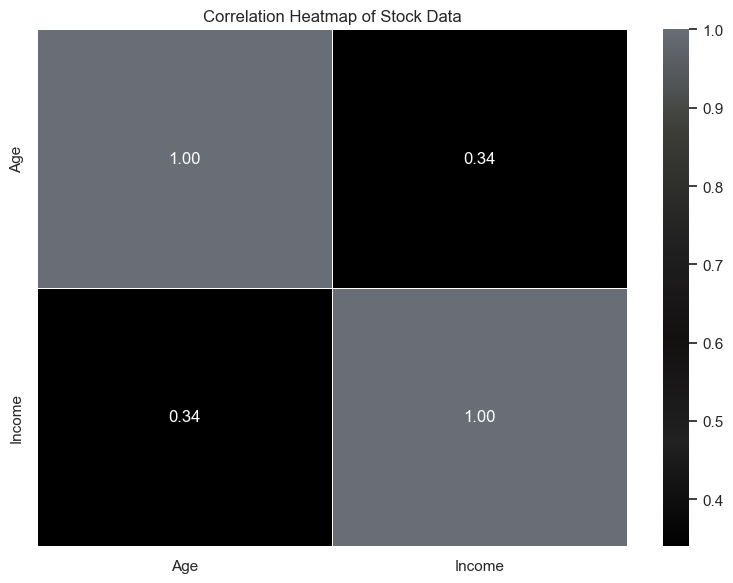

In [499]:
#Correlation Heatmap
# Define your custom color palette
colorr =['#000000','#212121','#131010','#222222','#3C3D37','#686D76']

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_colorr", colorr, N=256)

# Convert numerical columns to proper data types
num_cols = ["Age","Income"]
income[num_cols] = income[num_cols].apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
correlation_matrix = income[num_cols].corr()

# Plot the heatmap using the custom color palette
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Stock Data")
plt.tight_layout()

# Save the chart before showing
plt.savefig("correlation_heatmap.jpeg", format='jpeg', dpi=300)

# Show the chart
plt.show()



## **Findings**

There is a Positive but weak correlation between Income and Age,as Age increases income also increase by a smaller margin

# MACHINE LEARNING

In [500]:
# Create income classes
def categorize_income(income):
    if income < 100000:
        return 'low'
    elif 100000 <= income <= 200000:
        return 'medium'
    else:
        return 'high'

income['income_class'] = income['Income'].apply(categorize_income)

# inputs and outputs of data
X = income.drop(['ID', 'Income', 'income_class'], axis=1)
y = income['income_class']

# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Preprocessing
numeric_features = ['Age']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['Sex', 'Marital status', 'Education', 'Occupation']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [501]:
# Random Forest model
rf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('classifier', RandomForestClassifier(random_state=42))])

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Results:
              precision    recall  f1-score   support

        high       0.22      0.14      0.17        14
         low       0.69      0.70      0.70       115
      medium       0.83      0.84      0.84       271

    accuracy                           0.78       400
   macro avg       0.58      0.56      0.57       400
weighted avg       0.77      0.78      0.77       400

Accuracy: 0.7775


In [502]:
# Logistic Regression
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42))])

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        14
         low       0.71      0.73      0.72       115
      medium       0.84      0.87      0.86       271

    accuracy                           0.80       400
   macro avg       0.52      0.53      0.53       400
weighted avg       0.77      0.80      0.79       400

Accuracy: 0.8025


In [503]:
# SVM
svm = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SVC(kernel='rbf', random_state=42))])

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("\nSVM Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


SVM Results:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        14
         low       0.70      0.72      0.71       115
      medium       0.84      0.87      0.85       271

    accuracy                           0.80       400
   macro avg       0.51      0.53      0.52       400
weighted avg       0.77      0.80      0.78       400

Accuracy: 0.795


**Findings**

After building models to predict Incomes based on certain social economic factors we indicated and testing the accuracy
of each model,The accuracy scores showed were,

1. Random Forest - 0.7775 
2. Linear Regression- .8025
3. SVM - 0.795

# MODEL TUNING

In [521]:
from sklearn.model_selection import GridSearchCV

#Random Forest Tuning
# Define parameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

# Create GridSearchCV object
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
rf_grid.fit(X_train, y_train)

# Best parameters and score
print("Random Forest - Best Parameters:", rf_grid.best_params_)
print("Random Forest - Best Accuracy:", rf_grid.best_score_)

# Evaluate on test set
y_pred = rf_grid.predict(X_test)
print("\nTuned Random Forest Test Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random Forest - Best Parameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Random Forest - Best Accuracy: 0.81125

Tuned Random Forest Test Results:
              precision    recall  f1-score   support

        high       0.40      0.14      0.21        14
         low       0.70      0.71      0.71       115
      medium       0.84      0.86      0.85       271

    accuracy                           0.79       400
   macro avg       0.65      0.57      0.59       400
weighted avg       0.78      0.79      0.79       400

Accuracy: 0.7925


In [525]:
# Define parameter grid for Logistic Regression
#Logistic regression tuning
logreg_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2', 'none'],
    'classifier__solver': ['lbfgs', 'sag', 'saga'],
    'classifier__max_iter': [100, 200, 500]
}

# Create GridSearchCV object
logreg_grid = GridSearchCV(logreg, logreg_param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
logreg_grid.fit(X_train, y_train)

# Best parameters and score
print("\nLogistic Regression - Best Parameters:", logreg_grid.best_params_)
print("Logistic Regression - Best Accuracy:", logreg_grid.best_score_)

# Evaluate on test set
y_pred = logreg_grid.predict(X_test)
print("\nTuned Logistic Regression Test Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Logistic Regression - Best Parameters: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Logistic Regression - Best Accuracy: 0.8125

Tuned Logistic Regression Test Results:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        14
         low       0.72      0.73      0.73       115
      medium       0.84      0.88      0.86       271

    accuracy                           0.81       400
   macro avg       0.52      0.54      0.53       400
weighted avg       0.78      0.81      0.79       400

Accuracy: 0.8075


In [526]:
# Define parameter grid for SVM
#SVM tuning
svm_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.1, 1],
    'classifier__kernel': ['rbf', 'poly', 'sigmoid']
}

# Create GridSearchCV object
svm_grid = GridSearchCV(svm, svm_param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
svm_grid.fit(X_train, y_train)

# Best parameters and score
print("\nSVM - Best Parameters:", svm_grid.best_params_)
print("SVM - Best Accuracy:", svm_grid.best_score_)

# Evaluate on test set
y_pred = svm_grid.predict(X_test)
print("\nTuned SVM Test Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits

SVM - Best Parameters: {'classifier__C': 10, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}
SVM - Best Accuracy: 0.818131884862496

Tuned SVM Test Results:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        14
         low       0.71      0.72      0.72       115
      medium       0.83      0.86      0.85       271

    accuracy                           0.79       400
   macro avg       0.51      0.53      0.52       400
weighted avg       0.77      0.79      0.78       400

Accuracy: 0.7875


**Findings**
After tuning models to improve the accuracy of each model,Accuracy score all models increased with that of SVM reducing,The new accuracy scores are,
1. Random Forest - 0.7925 
2. Linear Regression- 0.8075
3. SVM - 0.7875

# VISUALIZATION OF MODELS 


# MODEL COMPARISON

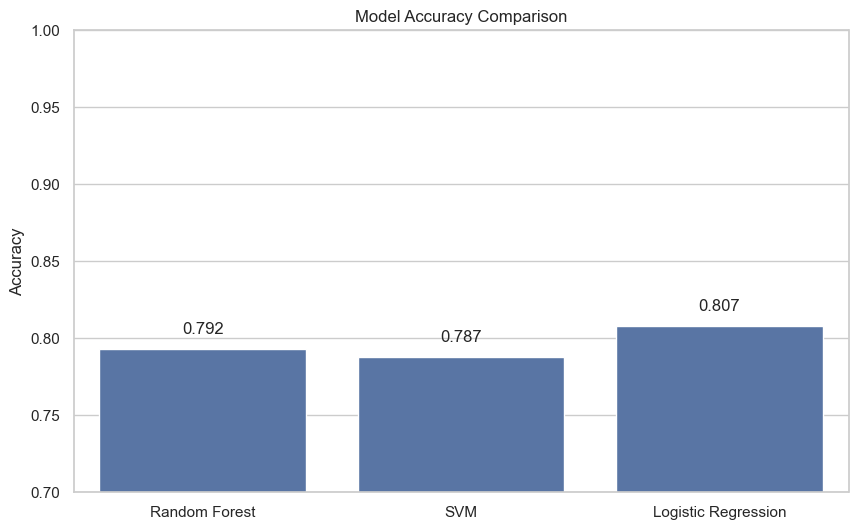

In [524]:
 models = {'Random Forest': rf_grid,'SVM': svm_grid,'Logistic Regression': logreg_grid}

accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.show()

**Findings**

Logistic Regression topped the chart with an Accuracy score of 0.8075